In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import entropy

In [3]:
kernel = np.ones((29,29),np.uint8)

In [11]:
def detectRectangles(img,kernel):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    blurred = cv2.GaussianBlur(gray,(11,11),0)
    
    ret, thresh = cv2.threshold(blurred,140,255,cv2.THRESH_BINARY)

    erode = cv2.morphologyEx(thresh, cv2.MORPH_ERODE, kernel,iterations=5)

    dilate = cv2.morphologyEx(erode, cv2.MORPH_DILATE, kernel,iterations=5)

    countours, hierarchy = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    rectangles = [cv2.boundingRect(countour) for countour in countours]
    copy = img.copy()

    idx = 0
    for rect in rectangles:
        # Skip the first rectangle because it is the whole image
        if idx == 0:
            idx+=1
            continue

        if rect[2] > 10 and rect[3] > 10:

            imgn = img[ rect[1]:rect[1]+rect[3] , rect[0]:rect[0]+rect[2]  ]
            imgn_h = cv2.cvtColor(imgn,cv2.COLOR_RGB2HSV)[:,:,0].flatten()
            imgn_s = cv2.cvtColor(imgn,cv2.COLOR_RGB2HSV)[:,:,1].flatten()
            imgn_v = cv2.cvtColor(imgn,cv2.COLOR_RGB2HSV)[:,:,2].flatten()
            # imgn_gray = cv2.cvtColor(imgn,cv2.COLOR_RGB2GRAY)

            imgn_h = imgn_h[np.logical_and(imgn_s > 100,imgn_v > 100)]
            hue_hist = np.histogram(imgn_h,bins=10,range=[0,180])[0]

            print(hue_hist)
            print(np.sum(hue_hist))
            hue_hist = hue_hist / np.sum(hue_hist)

            myentropy = entropy(hue_hist)

            plt.figure(figsize=(10,10))
            
            plt.subplot(1,3,1)
            plt.title("Region Of Interest")
            plt.imshow(imgn)

            plt.subplot(1,3,2)
            plt.title("Hue hist. Entropy: "+str(myentropy))
            plt.hist(imgn_h)
            # print(np.histogram(imgn_h[np.logical_and(imgn_s > 100,imgn_v > 100)]))

            # plt.subplot(1,3,3)
            # plt.title("Gray histogram")
            # plt.hist(imgn_gray.flatten())
            
            plt.show()
            
            cv2.rectangle(copy, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (255, 0, 0), 5)

        idx+=1
    
    return copy

[2001844       0       0       0       0       0       0       0       0
 1128527]
3130371


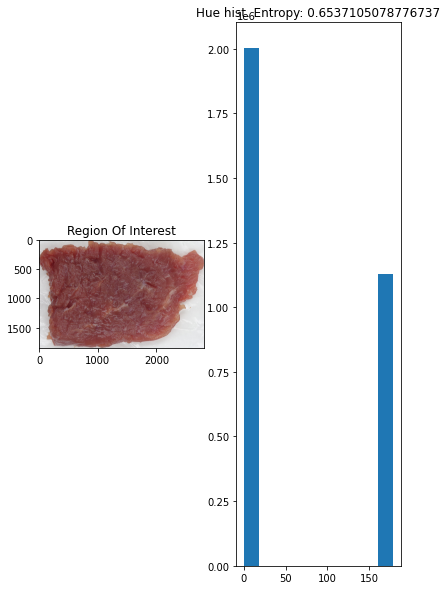

[10314 10545  4534  5005   181  6492 23511   244  4812 27200]
92838


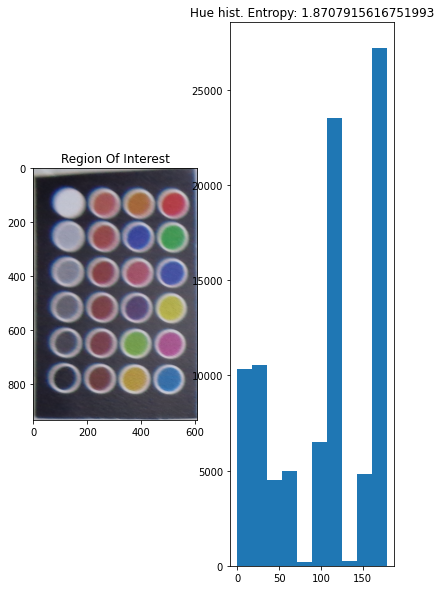

[  0   0   0   0   0  50 582   0   0   0]
632


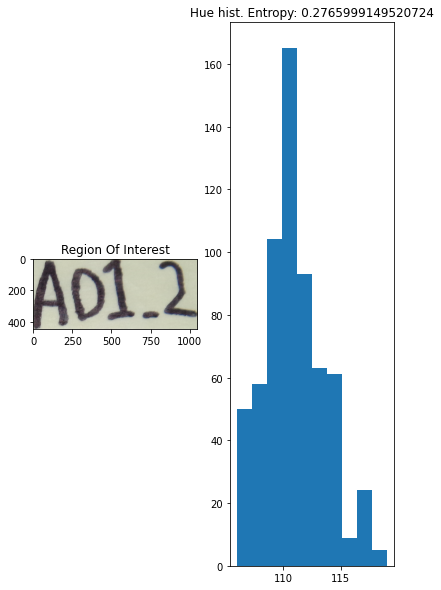

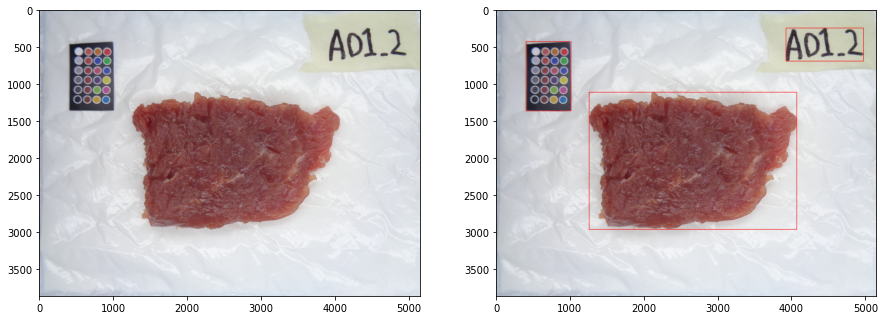

In [12]:
img = cv2.imread("fotos_carne/fotos_arrachera/20210830_A01_2_c.JPG",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

imgNew = detectRectangles(img,kernel)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(imgNew)
plt.show()